In [16]:
%load_ext autoreload
%autoreload 2
from pckgs.price_preprocess import *
import pandas as pd
from pckgs.helper import timeseries_to_supervised2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


            pChange0   pChange
Timestamp                     
2016-01-02 -0.062238 -0.062238
2016-01-03 -0.578941 -0.578941
2016-01-04  0.726151  0.726151
2016-01-05 -0.400765 -0.400765
2016-01-06 -0.663691 -0.663691
...              ...       ...
2019-12-27  0.802693  0.802693
2019-12-28  0.693348  0.693348
2019-12-29  1.223918  1.223918
2019-12-30 -2.238157 -2.238157
2019-12-31 -0.344725 -0.344725

[1460 rows x 2 columns]

 Value of observations: 

same    556
up      499
down    385
Name: pChange, dtype: int64


,pChange_scaled_t-1,pChange_scaled_t-2,pChange_scaled_t-3,pChange_scaled_t-4,pChange_scaled_t-5,pChange_scaled_t-6,pChange_scaled_t-7,pChange_scaled_t-8,pChange_scaled_t-9,pChange_scaled_t-10,...,pChange_scaled_t-14,pChange_scaled_t-15,pChange_scaled_t-16,pChange_scaled_t-17,pChange_scaled_t-18,pChange_scaled_t-19,pChange_scaled_t-20,down,same,up
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-22,-0.314641,0.243533,-0.344497,-0.175584,-0.320540,0.104178,-0.986057,-0.273074,-0.263584,-0.375391,...,-0.283517,0.054100,-0.270746,-0.258634,-0.206721,-0.266842,-0.243039,1,0,0
2016-01-23,-0.544293,-0.314641,0.243533,-0.344497,-0.175584,-0.320540,0.104178,-0.986057,-0.273074,-0.263584,...,-0.279451,-0.283517,0.054100,-0.270746,-0.258634,-0.206721,-0.266842,0,0,1
2016-01-24,-0.193810,-0.544293,-0.314641,0.243533,-0.344497,-0.175584,-0.320540,0.104178,-0.986057,-0.273074,...,-0.240685,-0.279451,-0.283517,0.054100,-0.270746,-0.258634,-0.206721,0,0,1
2016-01-25,-0.052280,-0.193810,-0.544293,-0.314641,0.243533,-0.344497,-0.175584,-0.320540,0.104178,-0.986057,...,-0.248281,-0.240685,-0.279451,-0.283517,0.054100,-0.270746,-0.258634,1,0,0
2016-01-26,-0.369154,-0.052280,-0.193810,-0.544293,-0.314641,0.243533,-0.344497,-0.175584,-0.320540,0.104178,...,-0.375391,-0.248281,-0.240685,-0.279451,-0.283517,0.054100,-0.270746,0,1,0


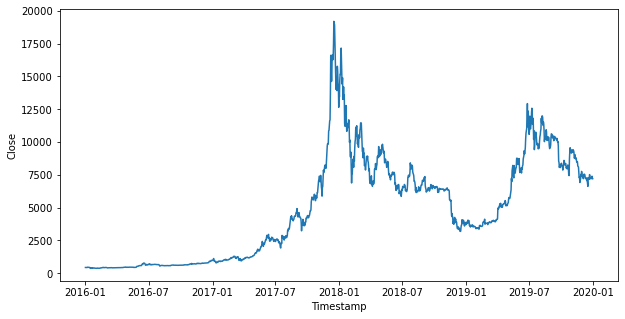

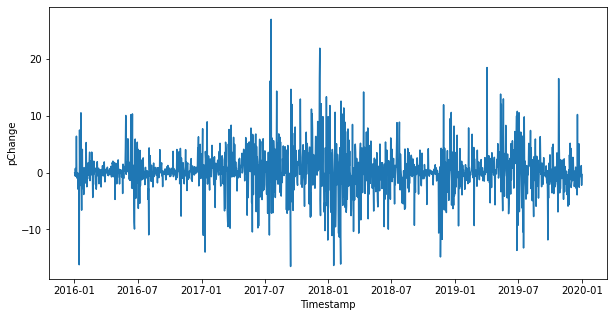

In [23]:
resample = 'D'
lag = 21
future = 1

df = pd.read_csv('./datasets/bitcoin.csv', header=0, parse_dates=['Timestamp'])
bp = BitcoinPreprocess(resample, lag, future)
df = bp.preprocess(df)
df.head()

In [19]:
# df = pd.read_csv('./datasets/bitcoin.csv', header=0, parse_dates=['Timestamp'])
# timeseries_to_supervised2(df.loc[:,['Open','Close']], 3)

,Open_t,Close_t,Open_t-1,Close_t-1,Open_t-2,Close_t-2
0,4.39,4.39,NaN,NaN,NaN,NaN
1,NaN,NaN,4.39,4.39,NaN,NaN
2,NaN,NaN,NaN,NaN,4.39,4.39
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
4572252,10324.35,10325.89,10324.60,10323.28,10320.86,10323.64
4572253,10331.41,10331.97,10324.35,10325.89,10324.60,10323.28
4572254,10327.20,10331.47,10331.41,10331.97,10324.35,10325.89
4572255,10330.02,10334.78,10327.20,10331.47,10331.41,10331.97


In [15]:
df.to_csv('./datasets/bitcoin_position_day_20_thres1.csv')

In [14]:
#Preprocess ohlc candle
resample = 'D'

df = pd.read_csv('./datasets/bitcoin.csv', header=0, parse_dates=['Timestamp'])
cp = CandlePreprocess(resample)
df = cp.preprocess(df)
df.head()

,Open,High,Low,Close
Timestamp,,,,
2016-01-01,430.89,436.00,427.20,433.82
2016-01-02,434.87,435.99,430.42,433.55
2016-01-03,433.20,434.09,424.06,431.04
2016-01-04,431.54,435.86,428.44,434.17
2016-01-05,433.31,435.39,429.50,432.43


In [15]:
df.to_csv('./datasets/bitcoin_candle_day.csv')